# A/B Testing Exercise

So far we've gone through the calculation of a single-sample hypothesis test.<br>

Now let's continue to a <b><u>two-sample test</b></u>! 

- Remember, A\B Testing is always about testing 2 hypotheses - The Null (H0) and the Alternative (H1).

<br>
<br>

Import The neccesary libraries

In [ ]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as st

<br>
<br>
<br>

---

<br>
<br>
<br>

# Establishing connection between "Colab" to "Google Drive"

In [ ]:
# Code for connecting our google drive to this collab notebook
from google.colab import drive
drive.mount('/content/drive')

# After you finish, look at the menu (gui to the left) and check under "files" that your "drive" folder was added.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Technion/4. Course/Lecturer/4. Data Science & Big Data/Data Science/Data Science/Ds Colab Files/A_B Testing"  # Check what files we have in the path
# Notice! we have "Grades.csv" file in that folder

'A_B Testing.ipynb'
'A_B Testing Stu - Answers.ipynb'
'A_B Testing Stu.ipynb'
 Backup
 Grades.csv
'Material helped to create notebook A_B Testing.ipynb'


<br>
<br>
<hr class="dashed">
<br>
<br>

Reading the dataset into pandas

In [ ]:
# read file into pandas using a relative path
grd = pd.read_csv("/content/drive/MyDrive/Technion/4. Course/Lecturer/4. Data Science & Big Data/Data Science/Data Science/Ds Colab Files/A_B Testing/Grades.csv", encoding='latin-1')
grd.columns = ['grades','justToVis']
grd.head(5)

,grades,justToVis
0,45,76
1,45,58
2,45,83
3,45,59
4,45,48


Spliting to x and y series

In [ ]:
grd_x = grd.loc[:,'grades']
grd_x

0       45
1       45
2       45
3       45
4       45
      ... 
994    100
995    100
996    100
997    100
998    100
Name: grades, Length: 999, dtype: int64

In [ ]:
grd_y = grd.loc[:,'justToVis']
grd_y

0      76
1      58
2      83
3      59
4      48
       ..
994    53
995    79
996    68
997    91
998    62
Name: justToVis, Length: 999, dtype: int64

Plot the data points

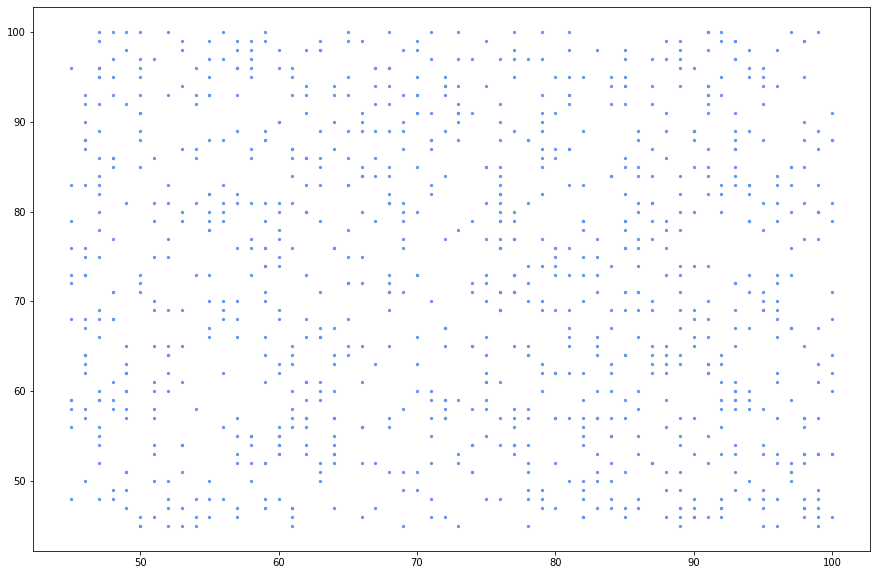

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(grd_x,grd_y, s=5, color='cornflowerblue')  # 's'=width
plt.show()

<br>

<font color="Red">Notice!</font>


<font color="Red">
We will limit the scope of the tests to the x-axis alone (for simplicity) 
</font>


<br>

Now let’s take a random samples of size 30 from this population:

In [ ]:
rand1 = np.random.choice(range(1000), 30, replace=False) # replace: Whether the sample is with or without replacement

# sample 1
sample1_x = grd_x[rand1] # selectimg 30 points from the population
sample1_y = grd_y[rand1]                        # just to visualization for the y axis

In [ ]:
sample1_x

473    72
334    64
605    80
882    94
711    85
140    53
765    88
70     48
476    72
221    58
714    86
305    62
414    69
295    62
800    90
213    57
527    76
435    70
74     48
786    89
692    85
841    92
707    85
556    77
211    57
866    93
667    83
856    93
162    54
706    85
Name: grades, dtype: int64

In [ ]:
sample1_x.count()

30

Plot both population and sample point

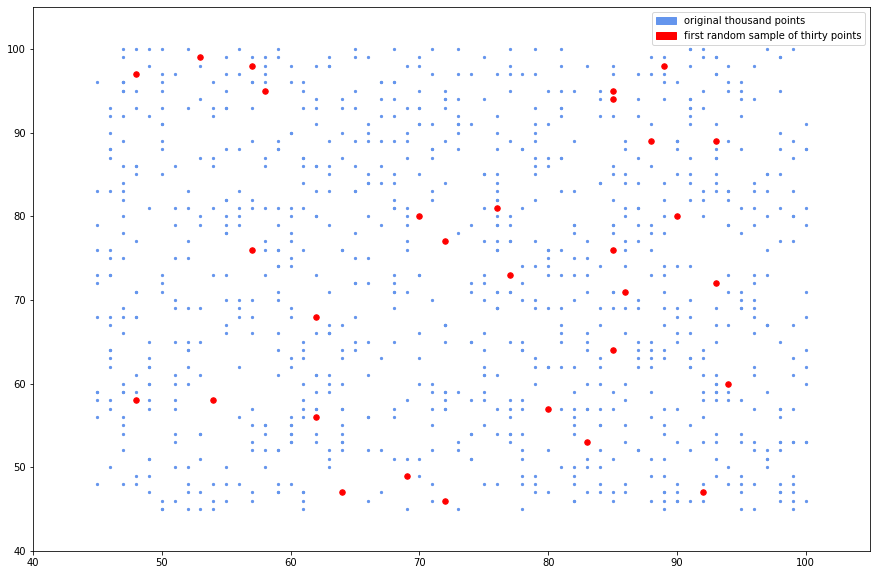

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(grd_x, grd_y, s=5, color='cornflowerblue')
plt.scatter(sample1_x, sample1_y, s=30, color='red')


blue_patch = mpatches.Patch(color='cornflowerblue', label='original thousand points')
red_patch = mpatches.Patch(color='red', label='first random sample of thirty points')

plt.legend(handles=[blue_patch, red_patch])

plt.axvline(0)
plt.axhline(0)#  ((0,0), slope=0)
plt.xlim(40,105)
plt.ylim(40,105)
plt.show()

In [ ]:
grd_x.mean(), grd_x.std()

(73.13413413413413, 16.165291811307185)

In [ ]:
sample1_x.mean(), sample1_x.std()

(74.23333333333333, 14.789752587829026)

Sample_1 (RED):
- Mean: -.23
- SD: 0.93

We know TURE population mean and standard deviation (because the 1000 sample):
- μ = 0
- σ = 1.0

So we can safely say these samples are pretty representative of the whole population.... Or is it ?<br>
Maybe we found different Data points with different values than before...<br>
We can think of the population as the population of strawberries that have a certain mean width, and the sample data as new type of strawberies with different mean width.
<br>
<br>

But the question is, if those samples width mean is by chance or did we find new types of strawberry ?
Are those strawberries are from the same known population with the same known mean or are they a new type of strawberries with new mean ?

It looks like the sample mean is a little under the real thing.<br>



#### This question is what A/B testing tries to answer.

Here as well we have a formula for the test statistic.<br> 

It is basically the same thing!<br>
We are still calculating the difference between the null and alternative hypothesis divided by the standard error:


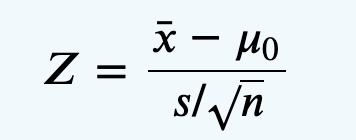

Where:
- x-bar is the mean of the sample
- myu-zero is the population mean
- s is the sample standard deviation
- n is the sample size <br><br>

We’re still assuming that the sample is drawn from a Normal distribution.<br> 

So all the rest is the same:
- picking a level of significance (an alpha)
- Finding a critical value

<br>

The following code defines a function for an A/B test:

In [ ]:
# formula for two-sample hypothesis test with mean

def ab_test(sample_A, p_value=.05):
    mean_A = np.mean(sample_A)
    
    std_A = np.std(sample_A)
    
    standard_error = std_A / np.sqrt(len(sample_A))
    
    
    test_statistic = mean_A/standard_error # this is the fomula from above 
    
    crit = st.norm.ppf(p_value/2)*-1 # Calculating the critical value
    reject_status = 'Reject Null Hypothesis' if crit < test_statistic else 'Fail to Reject Null Hypothesis'
    
    return 'Test Statistic: ', test_statistic, 'Critical Value: ', crit, reject_status

Let’s Check the results


In [ ]:
ab_test(sample1_x, .05)

('Test Statistic: ',
 -1.3686163230075836,
 'Critical Value: ',
 1.9599639845400545,
 'Fail to Reject Null Hypothesis')

As expected we will NOT reject H0. 

<br>


This is crucial information for companies testing out different website versions or drug efficacies.
As always, it’s important to understand your data inside and out before making strong claims about it, even when wielding statistical tests and performing A/B testing, because false-though-apparent statistical significance is rampant in many fields